In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
df = pd.read_csv('insurance.csv')

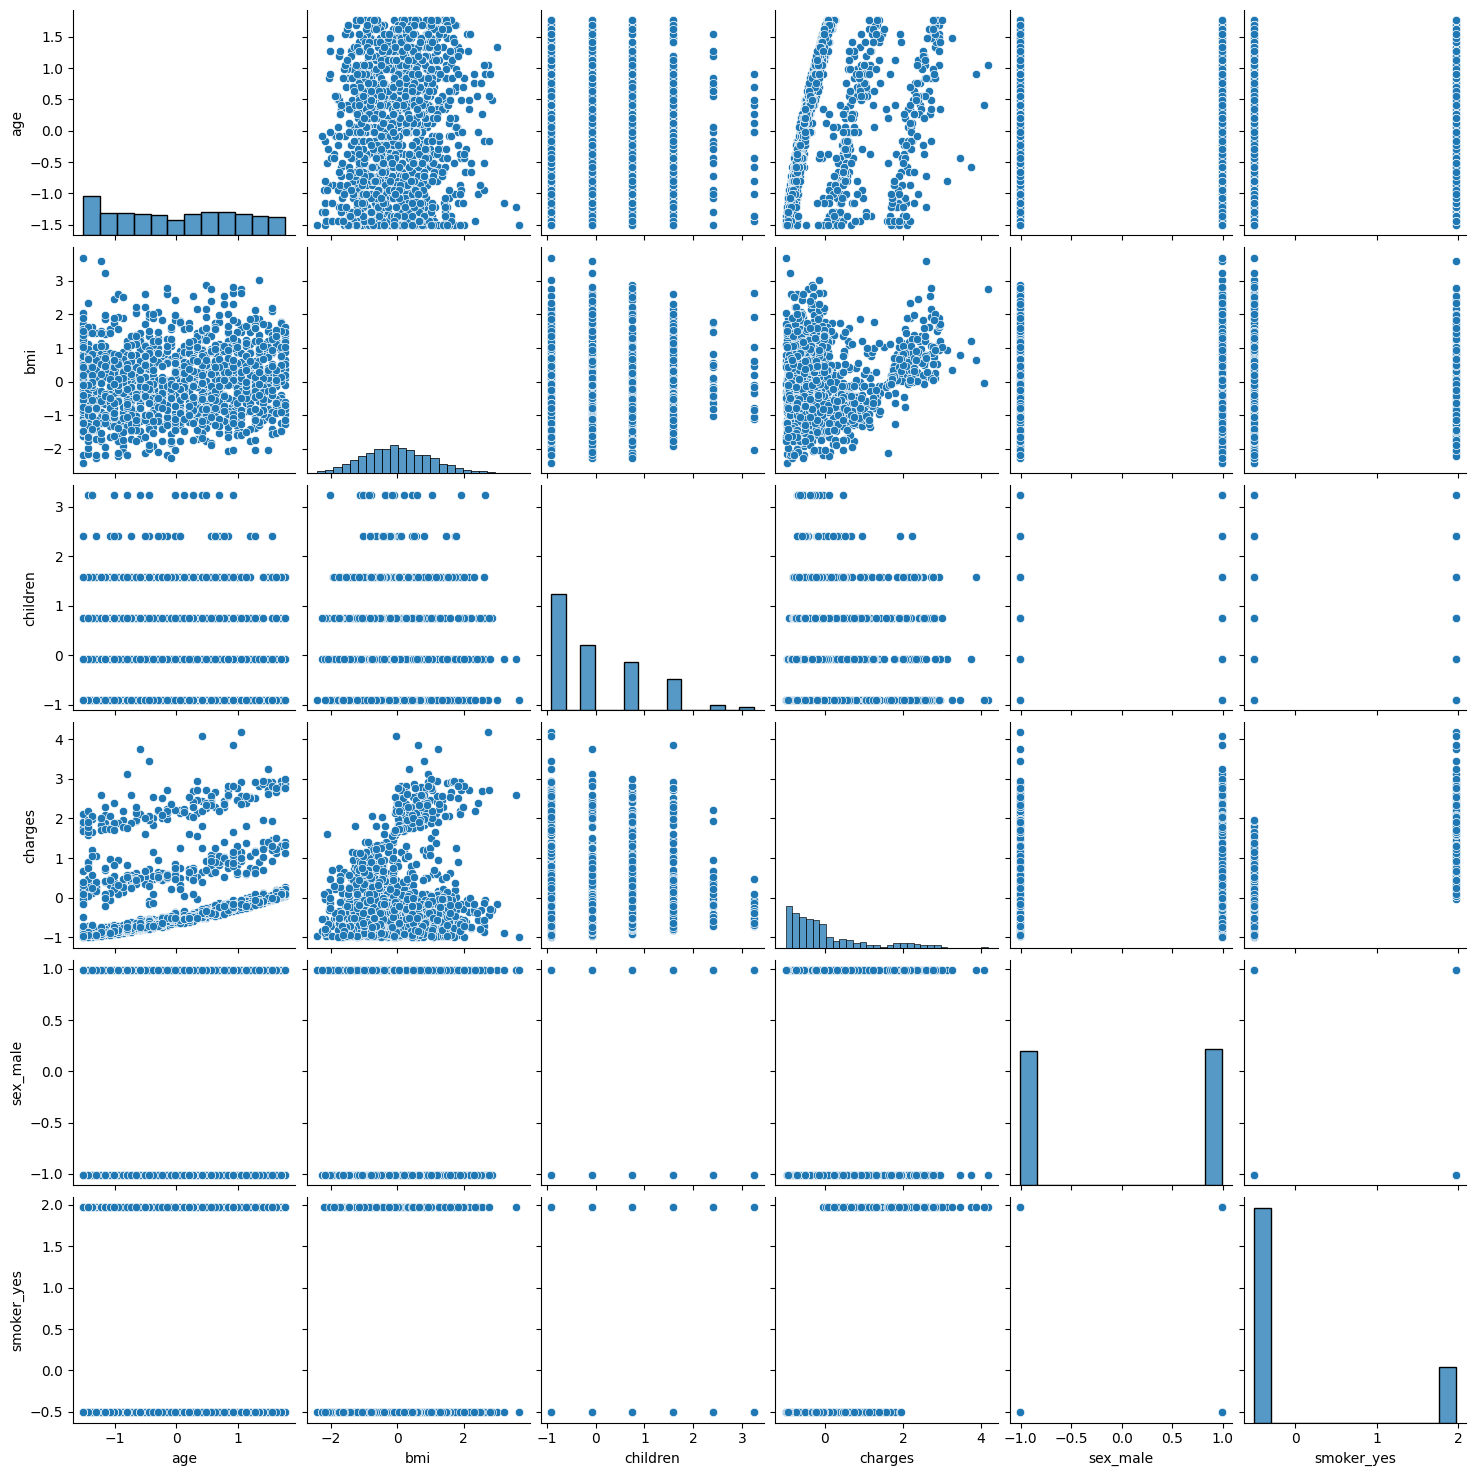

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_cols = ['sex', 'smoker']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

numeric_cols = df.select_dtypes(include=['number'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)

sns.pairplot(scaled_df)
plt.show()

df.to_csv('insurance_preprocessed.csv', index=False)

# Multiple Linear Regression
using 'charges' as a targeted value

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_column = scaled_df.columns[-1]
X = scaled_df.drop(columns=[target_column])
y = scaled_df[target_column]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Regression equotion and Visualization

In [6]:
coefficients = model.coef_
intercept = model.intercept_

equation = f"y = {intercept:.2f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.2f} * {col})"
print("Regression Equation:")
print(equation)

Regression Equation:
y = -0.00 + (-0.28 * age) + (-0.15 * bmi) + (-0.03 * children) + (0.90 * charges) + (0.02 * sex_male)


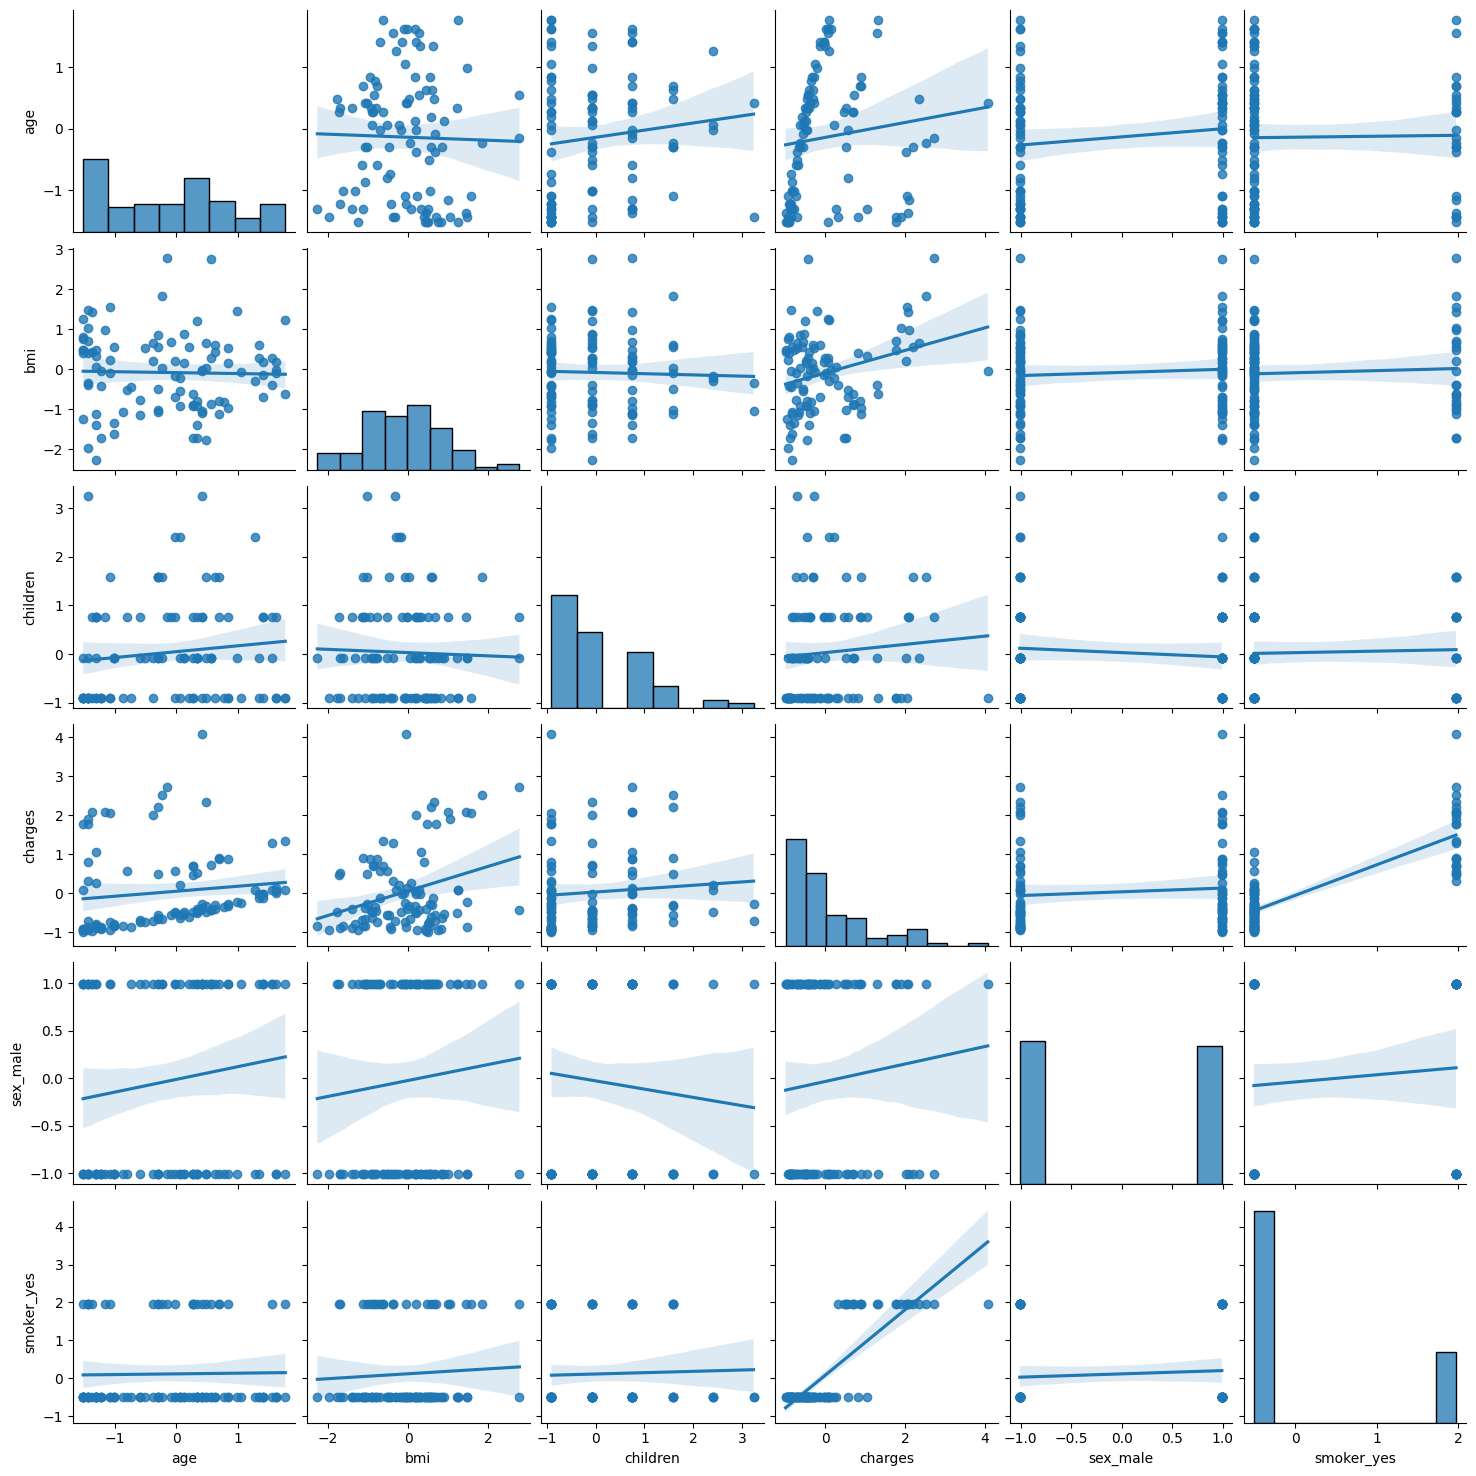

In [7]:
sns.pairplot(scaled_df.sample(100), kind="reg")
plt.show()

# Accuracy check

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rss = np.sum((y_test - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

n = len(y_test)
k = X_train.shape[1]
rse = np.sqrt(rss / (n - k - 1))

tss = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = r2_score(y_test, y_pred)

se_b = np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train) * (rss / (n - k - 1))))
t_b = model.coef_ / se_b

print(f"RSS: {rss:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RSE: {rse:.4f}")
print(f"R^2: {r2:.4f}")
for i, coef in enumerate(model.coef_):
    print(f"Coefficient for {X_train.columns[i]}: {coef:.4f}, t_b: {t_b[i]:.4f}")


RSS: 68.8637
RMSE: 0.5069
RSE: 0.5127
R^2: 0.7399
Coefficient for age: -0.2832, t_b: -17.3049
Coefficient for bmi: -0.1476, t_b: -9.1269
Coefficient for children: -0.0336, t_b: -2.1510
Coefficient for charges: 0.8980, t_b: 53.5581
Coefficient for sex_male: 0.0208, t_b: 1.3248


Resuts are satisfying with R² 0.7399, thus model has good significance.\
RMSE is near 0.5 which is moderate prediction accuracy.\
RSE is close to RMSE so there is no overfitting.\
Age BMI and Charges are the most signifcant and Children less significant.

# Predicting 3 new values

In [9]:
import numpy as np

new_data = np.array([[57, 37, 3, 10000, 1, 0],
                     [28, 27, 1, 50000, 0, 0],
                     [75, 40, 1, 32000, 1, 0]])

scaled_new_data = scaler.transform(new_data)
y_pred_new = model.predict(scaled_new_data[:, :-1])

scaled_new_data[:, -1] = y_pred_new
unscaled_new_data = scaler.inverse_transform(scaled_new_data)

for i, prediction in enumerate(y_pred_new):
    print(f"Data point {i + 1} (age, bmi, children, charges, sex_male) = {new_data[i][:-1]}, Predicted value = {prediction:.4f} ; [{prediction - rmse}, {prediction + rmse}]")
print(f"\nWhere RMSE is: {rmse:.4f}")

print("\nUnscaled data with predictions:")
print(unscaled_new_data.astype(int))


Data point 1 (age, bmi, children, charges, sex_male) = [   57    37     3 10000     1], Predicted value = -0.7902 ; [-1.2971536748842998, -0.28334100508494464]
Data point 2 (age, bmi, children, charges, sex_male) = [   28    27     1 50000     0], Predicted value = 3.0181 ; [2.5111793120656416, 3.524991981864997]
Data point 3 (age, bmi, children, charges, sex_male) = [   75    40     1 32000     1], Predicted value = 0.4619 ; [-0.044993494267754564, 0.9688191755316007]

Where RMSE is: 0.5069

Unscaled data with predictions:
[[   57    37     3 10000     1     0]
 [   28    27     1 50000     0     1]
 [   75    40     1 32000     1     0]]


H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
